# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

# Loading the Dataset

In [64]:
file_path = '../dataset/anomaly_dataset.csv'
data = pd.read_csv(file_path)

# Selecting Columns and Dropping Missing Values

In [65]:
selected_columns = ['latitude.y', 'longitude.y', 'TMN', 'ETMN']
data_selected = data[selected_columns].dropna()

# Normalizing the Data

In [66]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_selected)

# Determining Optimal Number of Clusters using Elbow Method

In [67]:
inertias = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

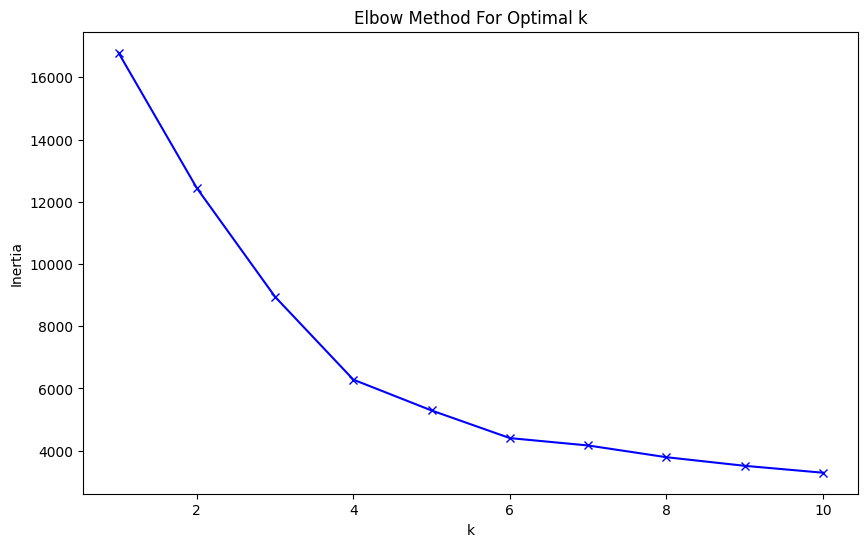

In [68]:
plt.figure(figsize=(10,6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Training K-means Model with Optimal Number of Clusters

In [69]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_data)
data_selected['Cluster'] = clusters

# Identifying Small Clusters as Potential Anomalies 

In [70]:
cluster_sizes = data_selected['Cluster'].value_counts()
print("Cluster sizes:\n", cluster_sizes)

anomalous_threshold = 150

anomalous_clusters = cluster_sizes[cluster_sizes < anomalous_threshold].index
print("Anomalous clusters:\n", anomalous_clusters)

anomalous_data = data_selected[data_selected['Cluster'].isin(anomalous_clusters)]
print("Anomalous data:\n", anomalous_data)

Cluster sizes:
 Cluster
4    2974
2     413
0     406
1     258
3     147
Name: count, dtype: int64
Anomalous clusters:
 Index([3], dtype='int32', name='Cluster')
Anomalous data:
        latitude.y  longitude.y  TMN  ETMN  Cluster
7       56.162939    10.203921    8   4.0        3
70       8.980603    38.757761    6   5.0        3
115     40.577113    -8.446270    5   5.0        3
251     38.676524    -9.165105    4   4.0        3
332     31.945367    35.928372   12   7.0        3
...           ...          ...  ...   ...      ...
10111   30.593099   114.305393    6   3.0        3
10188   35.443708   139.638026    6   5.0        3
10223   45.815011    15.981919   12   6.0        3
10244   41.648870    -0.889742    8   3.0        3
10332   47.376887     8.541694    8   4.0        3

[147 rows x 5 columns]


# Plotting Geographic Distribution of All Clusters

Text(0, 0.5, 'Latitude')

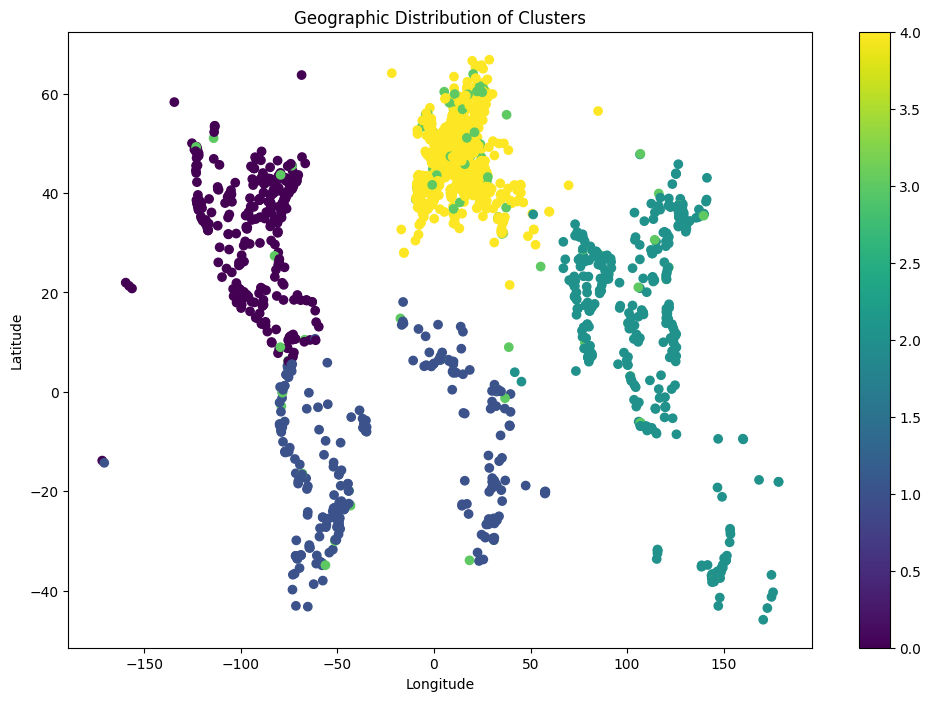

In [71]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(data_selected['longitude.y'], 
                     data_selected['latitude.y'],
                     c=data_selected['Cluster'],
                     cmap='viridis')
plt.colorbar(scatter)
plt.title('Geographic Distribution of Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plotting Geographic Distribution of Anomalies

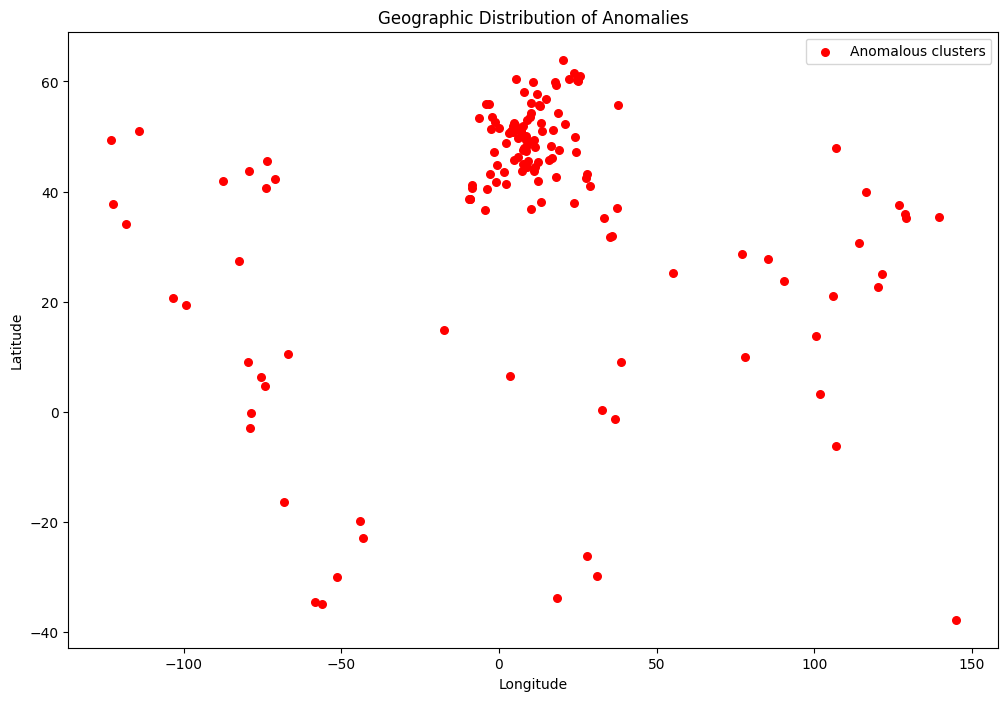

In [72]:
plt.figure(figsize=(12, 8))
scatter_anomalies = plt.scatter(anomalous_data['longitude.y'], 
                                anomalous_data['latitude.y'],
                                c='red', s=30, label='Anomalous clusters')
plt.title('Geographic Distribution of Anomalies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()